# Multi Label Binarizer

In [ ]:
import pandas as pd

## Disclaimer
* maybe not the best solution, I just want to document my progress and maybe get some feedback

## Problem
* I'm trying out image segmentation and found a great [notebook](https://www.kaggle.com/cdeotte/keras-unet-with-eda/) from Chris
* Unfortunately, the dataset changed. `train.csv` file has different format, and I have to figure another way to do one hot encode to match Chris's first output `Out[1]`
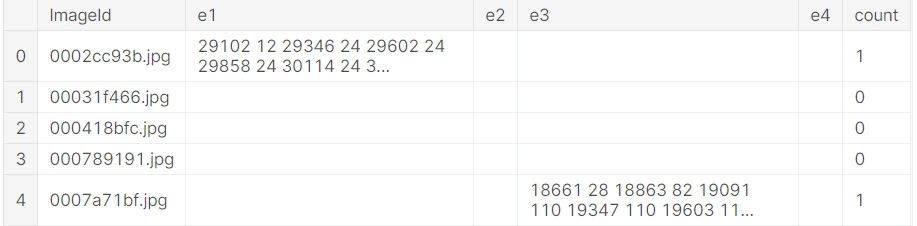

In [ ]:
train = pd.read_csv('../input/severstal-steel-defect-detection/train.csv')
train.head(10)

1. combine ClassId and EncodedPixels if an ImageId has more than 1 (ex: no 5 and 6)
2. create 1 hot encode (1 binary column for all possible classId)
3. replace the binary with EncodedPixels instead

In [ ]:
# find unique ImageId
unique_ids = train.ImageId.unique()
# dictionary placeholder
data = []

# for every unique id, get a list (.values) of their ClassId and EncodedPixels
for unique_id in unique_ids:
    ClassId = train.ClassId[train.ImageId==unique_id].values
    EncodedPixels = train.EncodedPixels[train.ImageId==unique_id].values
    data.append([unique_id,ClassId,EncodedPixels])

data[:3]

In [ ]:
# assign the encodedPixel to the right column
def doOneHotEncode(imgid, classid, enc_pix):
    i=0;e1='';e2='';e3='';e4=''
    for _id in classid:
        if _id==1:
            e1 = enc_pix[i]
            i+=1
        if _id==2:
            e2 = enc_pix[i]
            i+=1
        if _id==3:
            e3 = enc_pix[i]
            i+=1
        if _id==4:
            e4 = enc_pix[i]
            i+=1
    return imgid,e1,e2,e3,e4

# split and replace binary with encoded pixels
data2 = []
for row in data:
    data2.append(doOneHotEncode(row[0],row[1],row[2]))

train_df = pd.DataFrame(data2, columns=['ImageId','e1','e2','e3','e4'])
train_df.head(10)

## That's all?
maybe not the best solution, I just want to document my progress (took me a day to get this). If this helped you in anyway, then I'm grateful

## What if there's 80 categories?
I'll update this once I know better techniques. There's also scikit-learn [multiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) for lots of categories. feel free to say anything in the comments. Thank you